<a href="https://colab.research.google.com/github/cindyoshita/Taxa-em-Escolas-do-EUA/blob/main/Taxa_em_Escolas_do_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto para prever as taxas de escolas nos EUA

Integrantes:

Cindy Natsuki Yoshita RA 19.00633-0

Gabriel Belapetravicius Dias RA 18.00487-3

Raphael Gueleri Kalaes RA 18.02011-9

Thiago Akio Kanada Tanaka RA 19.01726-0

## Resumo


Um dos maiores desafios enfrentados pelos Estados Unidos é a taxa de presença dos alunos nas escolas. Diante desse problema, o presente projeto tem como principal objetivo utilizar técnicas de classificação para prever a taxa de presença de alunos no contexto da criação de novas escolas. O propósito é compreender os fatores que influenciam a taxa de presença dos alunos e fornecer incentivos adicionais às escolas que apresentam previsões desfavoráveis em relação à frequência dos estudantes.

## Descrição do problema
Uma questão que persiste nos Estados Unidos diz respeito à incidência de estudantes cronicamente ausentes, ou seja, aqueles que se ausentam da escola por mais de 15 dias consecutivos. Conforme reportado pelo Departamento de Educação dos Estados Unidos, a cifra ultrapassa os sete milhões de estudantes que se enquadram nessa categoria. Nesse contexto, o presente projeto tem como escopo principal a realização de previsões referentes às taxas futuras de frequência escolar, com base em dados governamentais dos Estados Unidos. Esse conjunto de dados contempla informações acerca da frequência de alunos de até 12 anos, no período de 2021 a 2022, em diversas instituições de ensino. A abordagem metodológica empregada para a consepção deste objetivo é pautada no emprego de técnicas de aprendizado de máquina, com o apoio da biblioteca SciKit-Learn.

## Resultados obtidos
O classificador que apresentou o melhor desempenho juntamente com os hiperparâmetros otimizados foi o SVC (Support Vector Classifier) com C=10, gamma=0.1 e kernel 'linear'. Esse modelo obteve uma acurácia de 96%, indicando sua capacidade de fazer previsões precisas.

No entanto, é importante destacar que a quantidade de escolas com taxas de presença classificadas como 'Low' (baixa) foi muito baixa e não estava representada na base de testes utilizada para avaliação do modelo. A maioria dos dados na base de teste estava classificada como 'High' (alta taxa de presença), com 465 exemplos, enquanto a classe 'Medium' (taxa de presença média) continha apenas 58 exemplos, de acordo com a imagem. Esse desequilíbrio na distribuição das classes indica que o modelo foi treinado principalmente com exemplos de alta taxa de presença, o que pode afetar sua capacidade de prever com precisão a classe 'Medium'.

Além disso, tendo em vista a imagem, observou-se que o valor do recall para a classe 'Medium' foi de 74%, indicando que o modelo pode estar perdendo alguns exemplos dessa classe. Isso sugere que o modelo pode não ser tão eficaz na identificação correta de escolas com taxas de presença para essa classe.

Em resumo, o modelo SVC com os hiperparâmetros otimizados obteve uma alta acurácia, mas sua capacidade de prever a classe 'Medium' pode ser limitada devido ao desequilíbrio na distribuição de classes e ao recall relativamente baixo.

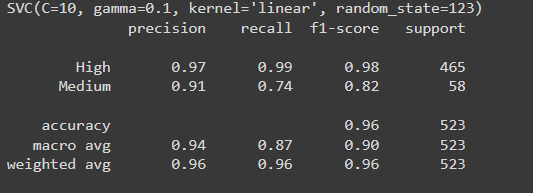

## Conclusão
O modelo demonstrou um desempenho geral sólido com uma alta acurácia de 96%. No entanto, é importante notar que a distribuição desigual dos rótulos (labels) nas classes 'Medium' e 'Low' afetou a capacidade do modelo de prever essas categorias com precisão. Em contraste, a classe 'High' continha uma quantidade substancial de dados, o que permitiu ao modelo fazer previsões mais confiáveis para essa categoria.

Para trazer melhores avaliações, é necessário obter mais dados de escolas com taxas Medium e Low.

O modelo se destacou na previsão das escolas com base em características como distrito, categoria de escola e grupo de estudantes presentes nas instituições de ensino. Isso sugere que o modelo é eficaz na identificação das escolas de acordo com a taxa de presença, permitindo orientar a criação de escolas adicionais, fornecendo incentivos específicos com base nessas características.

## Referências
https://catalog.data.gov/dataset/school-attendance-by-student-group-and-district-2021-2022

https://www2.ed.gov/datastory/chronicabsenteeism.html

https://www.ddouglas.k12.or.us/departments/student-services/attendance/what-is-regular-attendance/

## **Vídeo**

https://youtu.be/YsZ2HP8MlEU

## Código

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/cindyoshita/Taxa-em-Escolas-do-EUA/main/School_Attendance_by_Student_Group_and_District__2021-2022.csv')

df.head()

,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022


O conjunto de dados separou a taxa de presença e a quantidade de alunso em três colunas diferentes, um para cada ano, então, para manipular os dados, foi decidido juntar as 3 colunas em uma só com o total de alunos e o total de taxa para cada.

In [ ]:
# Quantidade de estudantes
concatenated_count = ["2021-2022 student count - year to date", "2020-2021 student count", "2019-2020 student count"]
df['total student count'] = df[concatenated_count].sum(axis=1)

# Taxa de presença de estudantes
concatenated_attendance_rate = ["2021-2022 attendance rate - year to date", "2020-2021 attendance rate", "2019-2020 attendance rate"]
df['total student attendance rate'] = df[concatenated_attendance_rate].sum(axis=1)

O conjunto de dados apresentavam muitos dados Nulos e NaN, então para uma melhor manipulação dos dados, foi decidido descartar essas colunas.

In [ ]:
df.isnull().sum()

District code                                 0
District name                                 0
Category                                    201
Student group                                 0
2021-2022 student count - year to date        0
2021-2022 attendance rate - year to date      0
2020-2021 student count                      56
2020-2021 attendance rate                    56
2019-2020 student count                      62
2019-2020 attendance rate                    62
Reporting period                              0
Date update                                   0
total student count                           0
total student attendance rate                 0
dtype: int64

In [ ]:
df = df.dropna()

Foi tirado essas colunas para melhor manipulação dos dados.

In [ ]:
df = df.drop(['District code', 'Reporting period', 'Date update', "2021-2022 student count - year to date", "2020-2021 student count", "2019-2020 student count", "2021-2022 attendance rate - year to date", "2020-2021 attendance rate", "2019-2020 attendance rate"], axis=1)
df.head()

,District name,Category,Student group,total student count,total student attendance rate
1,Connecticut,Homelessness,Students Experiencing Homelessness,7465.0,2.5387
2,Connecticut,Students With Disabilities,Students With Disabilities,235269.0,2.7122
3,Connecticut,Free/Reduced Lunch,Free Meal Eligible,538915.0,2.7026
4,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,88298.0,2.8001
5,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,627213.0,2.7168


Foi criado uma coluna "Classification" que classifica os dados do 'total student attendance rate'.

Para valores abaixo de 2.4 foi classificado como 'Low', para valores entre 2.4 e 2.7 foi classificado como 'Medium' e para valores acima de 2.7 foi classificado como 'High'

In [ ]:
def classificar_attendance_rate(v):
    if v < 2.4:
        return 'Low'
    elif 2.4 <= v < 2.7:
        return 'Medium'
    else:
        return 'High'

df['Classification'] = df['total student attendance rate'].apply(classificar_attendance_rate)

df.head()

,District name,Category,Student group,total student count,total student attendance rate,Classification
1,Connecticut,Homelessness,Students Experiencing Homelessness,7465.0,2.5387,Medium
2,Connecticut,Students With Disabilities,Students With Disabilities,235269.0,2.7122,High
3,Connecticut,Free/Reduced Lunch,Free Meal Eligible,538915.0,2.7026,High
4,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,88298.0,2.8001,High
5,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,627213.0,2.7168,High


Entre os classificadores SVC, Random Forest e Logistic Regression, foi escolhido o melhor modelo e os melhores

In [ ]:
colunas_numericas = ['total student count']
colunas_categoricas = ['District name', 'Category', 'Student group']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)])

X = df.drop(['total student attendance rate','Classification'], axis=1)
y = df['Classification']


In [ ]:
X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

base_estimators = [ LogisticRegression(),
                    DecisionTreeClassifier(),
                    DecisionTreeClassifier(max_depth=2),
                    SVC(kernel='linear', C=1),
                    SVC(),
                     ]

best_score = 0

for estimator in base_estimators:
  clf = estimator
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print(clf)

  accuracy = clf.score(X_test, y_test)
  print('\nScore de Acuracidade (2):\n')
  print(f'{accuracy:.2f}')

  if accuracy > best_score:
    best_score = accuracy
    best_model = clf

  print('\nClassification Report:\n')
  print(classification_report(y_test, y_pred))



print('\n Best Model: ' , best_model, ' score = ', best_score)

LogisticRegression()

Score de Acuracidade (2):

0.95

Classification Report:

              precision    recall  f1-score   support

        High       0.95      1.00      0.97       465
      Medium       0.97      0.60      0.74        58

    accuracy                           0.95       523
   macro avg       0.96      0.80      0.86       523
weighted avg       0.95      0.95      0.95       523

DecisionTreeClassifier()

Score de Acuracidade (2):

0.93

Classification Report:

              precision    recall  f1-score   support

        High       0.97      0.96      0.96       465
         Low       0.00      0.00      0.00         0
      Medium       0.69      0.69      0.69        58

    accuracy                           0.93       523
   macro avg       0.55      0.55      0.55       523
weighted avg       0.94      0.93      0.93       523

DecisionTreeClassifier(max_depth=2)

Score de Acuracidade (2):

0.89

Classification Report:

              precision    recall  f

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

SVC()

Score de Acuracidade (2):

0.90

Classification Report:

              precision    recall  f1-score   support

        High       0.90      1.00      0.95       465
      Medium       1.00      0.14      0.24        58

    accuracy                           0.90       523
   macro avg       0.95      0.57      0.60       523
weighted avg       0.91      0.90      0.87       523


 Best Model:  SVC(C=1, kernel='linear')  score =  0.9674952198852772


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

base_estimator = SVC(random_state=123)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 1, 10]}

clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='f1_macro')
clf.fit(X_train, y_train)

print(clf.best_estimator_)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


SVC(C=10, gamma=0.1, kernel='linear', random_state=123)
              precision    recall  f1-score   support

        High       0.97      0.99      0.98       465
      Medium       0.91      0.74      0.82        58

    accuracy                           0.96       523
   macro avg       0.94      0.87      0.90       523
weighted avg       0.96      0.96      0.96       523



## Dados (anonimizados quando necessário)

Dados no github:

https://raw.githubusercontent.com/cindyoshita/Taxa-em-Escolas-do-EUA/main/School_Attendance_by_Student_Group_and_District__2021-2022.csv

Dados no link do governo:

https://data.ct.gov/api/views/t4hx-jd4c/rows.csv?accessType=DOWNLOAD
